# Detecting and Managing Outliers

**Introduction to Outliers**

Outliers are data points that deviate significantly from other observations in a dataset. They can arise from various reasons, such as measurement errors, data entry errors, or genuine anomalies. While outliers can distort statistical analyses and affect the performance of machine learning models, they can also represent valuable information and be the focus of research.

**Common Examples of Outliers**
- **Finance**: Unusually high or low stock prices or trading volumes
- **Healthcare**: Abnormal test results or rare diseases
- **Marketing**: Extremely high or low customer spending behavior
- **Environment**: Rare weather events like hurricanes or earthquakes

Outliers can sometimes represent valuable insights, such as identifying fraud in financial transactions or discovering a breakthrough in medical research. Therefore, it's crucial to carefully analyze and understand outliers before deciding on how to handle them.


## 1. Detecting Univariate and Multivariate Outliers

### Univariate Outliers

Univariate outliers are identified within a single variable.

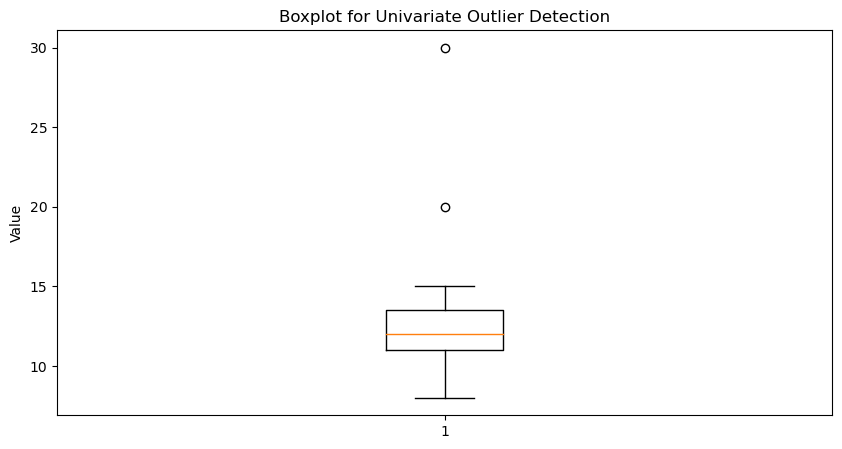

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example DataFrame
data = {'Value': [10, 12, 12, 13, 12, 12, 11, 14, 30, 13, 11, 12, 11, 14, 15, 20, 9, 8, 10]}
df = pd.DataFrame(data)

# Detecting univariate outliers using boxplot
plt.figure(figsize=(10, 5))
plt.boxplot(df['Value'])
plt.title('Boxplot for Univariate Outlier Detection')
plt.ylabel('Value')
plt.show()

### Multivariate Outliers

Multivariate outliers are identified based on the relationship between multiple variables.

In [2]:
from sklearn.ensemble import IsolationForest

# Example DataFrame
data = {'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 50],
        'Feature2': [2, 3, 4, 5, 6, 7, 8, 9, 50]}
df_multi = pd.DataFrame(data)

# Detecting multivariate outliers using Isolation Forest
iso = IsolationForest(contamination=0.1, random_state=42)
df_multi['Outlier'] = iso.fit_predict(df_multi[['Feature1', 'Feature2']])

C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [3]:
print(df_multi)

   Feature1  Feature2  Outlier
0         1         2        1
1         2         3        1
2         3         4        1
3         4         5        1
4         5         6        1
5         6         7        1
6         7         8        1
7         8         9        1
8        50        50       -1


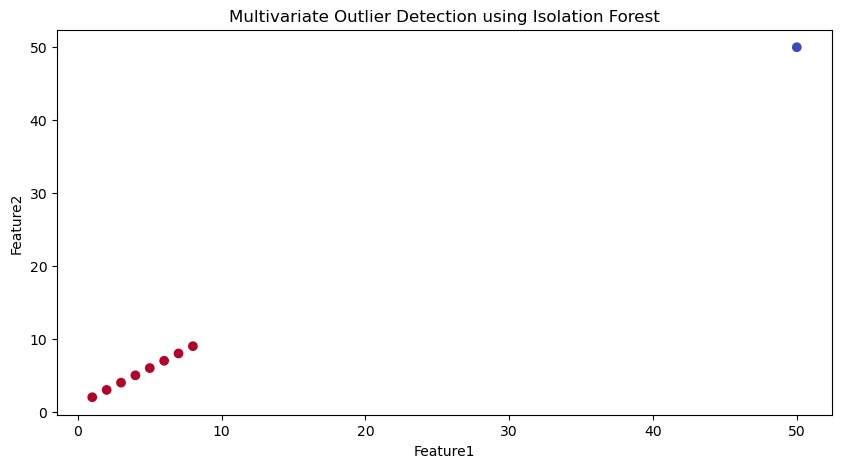

In [4]:
# Visualizing the outliers
plt.figure(figsize=(10, 5))
plt.scatter(df_multi['Feature1'], df_multi['Feature2'], c=df_multi['Outlier'], cmap='coolwarm')
plt.title('Multivariate Outlier Detection using Isolation Forest')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

## 2. Detection Methods

### Z-Score

The Z-score indicates how many standard deviations an element is from the mean. It is a useful way to identify outliers in normally distributed data.

---


>$$Z = \frac{X - \mu}{\sigma}$$

Where:
- $Z$ is the Z-score
- $X$ is the value of the element
- $\mu$ is the mean of the dataset
- $\sigma$ is the standard deviation of the dataset


---

**Interpretation**

- A Z-score of 0 indicates that the element is exactly at the mean
- A positive Z-score indicates that the element is above the mean
- A negative Z-score indicates that the element is below the mean
- Typically, Z-scores greather than 3 or less than -3 are considered outliers

In [5]:
# Example DataFrame
data = {'Value': [10, 12, 12, 13, 12, 12, 11, 14, 100, 13, 11, 12, 11, 14, 15, 1000, 9, 8, 10]}
df = pd.DataFrame(data)

# Calculating the Z-scores
mean_value = df['Value'].mean()
std_dev_value = df['Value'].std()
df['Z_score'] = (df['Value'] - mean_value) / std_dev_value

# Identifying outliers
outliers_z = df[np.abs(df['Z_score']) > 3]
print("Data points with Z-score greater than 3 or less than -3:")
print(outliers_z)


Data points with Z-score greater than 3 or less than -3:
    Value  Z_score
15   1000  4.11287


Visualizing Z-scores helps to understand the distribution of values relative to the mean.

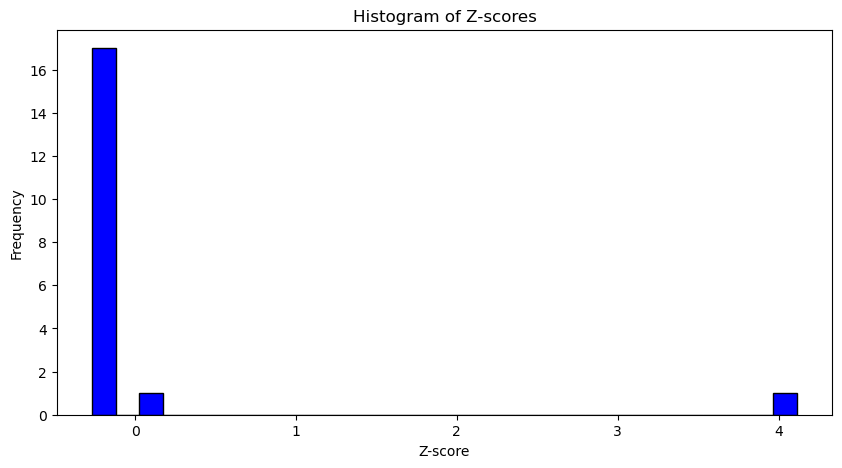

In [6]:
# Visualizing Z-scores
plt.figure(figsize=(10, 5))
plt.hist(df['Z_score'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Z-scores')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.show()


### Interquartile Range (IQR)

The IQR is the range between the first quartile (25th percentile) and the third quartile (75th percentile). It is a robust measure of variability.

---


>$$\text{IQR} = Q3 - Q1$$

Where:
* $Q1$ is the 25th percentile
* $Q3$ is the 75th percentile


---

**Outlier Detection using IQR**:

* Lower Bound: $Q1 - 1.5 \times \text{IQR}$
* Upper Bound: $Q1 + 1.5 \times \text{IQR}$

In [7]:
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Detecting outliers using IQR
outliers_iqr = df[(df['Value'] < (Q1 - 1.5 * IQR)) | (df['Value'] > (Q3 + 1.5 * IQR))]
print("Outliers detected using IQR method:")
print(outliers_iqr)


Outliers detected using IQR method:
    Value   Z_score
8     100  0.139644
15   1000  4.112870


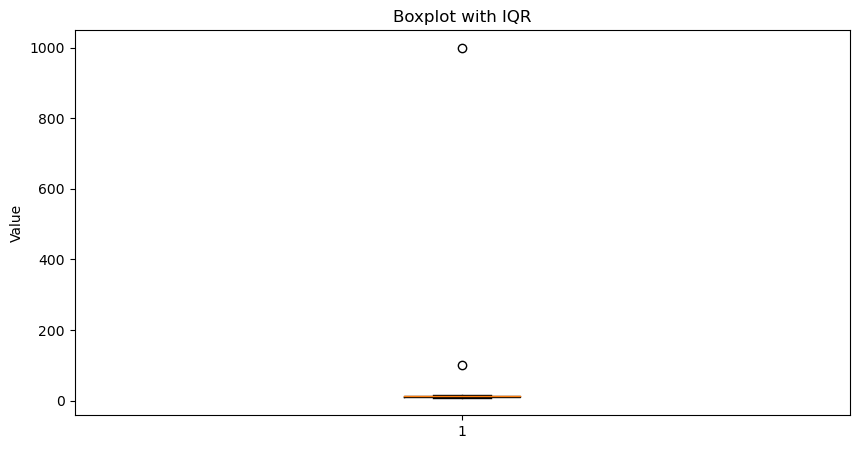

In [8]:
# Visualizing IQR
plt.figure(figsize=(10, 5))
plt.boxplot(df['Value'])
plt.title('Boxplot with IQR')
plt.ylabel('Value')
plt.show()

## 3. Impact of Outliers on Analyses

Outliers can have several impacts on data analysis, such as:

* **Skewing statistical measures**: Outliers can distort means, standard deviations, and other statistics.
* **Biasing predictions**: Outliers can lead to biased results in predictive models.
* **Affecting accuracy**: Outliers can reduce the accuracy of machine learning models.

## 4. Treating Outliers

#### Winsorization
Winsorization involves limiting extreme values in the data. It replaces the extreme values beyond a certain percentile with the nearest values within the given percentile range. This technique helps to reduce the effect of possibly spurious outliers while preserving the data's characteristics.

In [9]:
from scipy.stats.mstats import winsorize

# Winsorizing the data
df['Winsorized'] = winsorize(df['Value'], limits=[0.05, 0.05])
print("Data after Winsorization:")
print(df)


Data after Winsorization:
    Value   Z_score  Winsorized
0      10 -0.257679          10
1      12 -0.248849          12
2      12 -0.248849          12
3      13 -0.244435          13
4      12 -0.248849          12
5      12 -0.248849          12
6      11 -0.253264          11
7      14 -0.240020          14
8     100  0.139644         100
9      13 -0.244435          13
10     11 -0.253264          11
11     12 -0.248849          12
12     11 -0.253264          11
13     14 -0.240020          14
14     15 -0.235605          15
15   1000  4.112870        1000
16      9 -0.262094           9
17      8 -0.266508           8
18     10 -0.257679          10


Winsorization is particularly useful when:

* The data contains extreme values that are suspected to be errors or noise.
* We want to reduce the influence of outliers on statistical measures without completely removing them.

#### Log Transformation
Log transformation is a technique used to stabilize the variance of a dataset, normalize the distribution, and reduce the impact of outliers by compressing the range of values. This transformation is especially effective for positively skewed data where the variance increases with the mean.

---


>$$X' = \log(X + 1)$$


---

Adding 1 to the data before applying the log function ensures that we avoid taking the logarithm of zero, which is undefined.

**Advantages of Log Transformation:**
- **Reduces Skewness**: Converts a skewed distribution into a more normalized distribution.
- **Stabilizes Variance**: Helps in stabilizing the variance across the data, making it more homoscedastic.
- **Compresses Range**: Compresses the range of values, thus reducing the impact of extreme outliers.


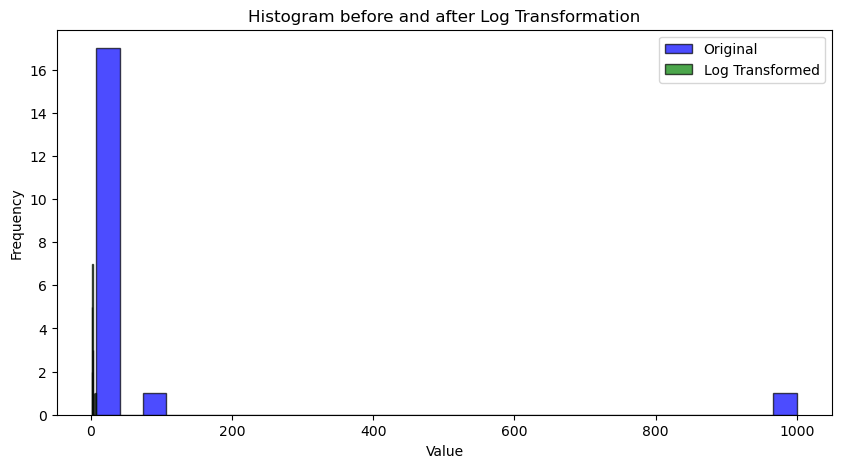

Data after log transformation:
    Value  Log_Transformed
0      10         2.397895
1      12         2.564949
2      12         2.564949
3      13         2.639057
4      12         2.564949
5      12         2.564949
6      11         2.484907
7      14         2.708050
8     100         4.615121
9      13         2.639057
10     11         2.484907
11     12         2.564949
12     11         2.484907
13     14         2.708050
14     15         2.772589
15   1000         6.908755
16      9         2.302585
17      8         2.197225
18     10         2.397895


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example DataFrame
data = {'Value': [10, 12, 12, 13, 12, 12, 11, 14, 100, 13, 11, 12, 11, 14, 15, 1000, 9, 8, 10]}
df = pd.DataFrame(data)

# Applying log transformation
df['Log_Transformed'] = np.log(df['Value'] + 1)  # Adding 1 to avoid log(0)

# Visualizing the effect of log transformation
plt.figure(figsize=(10, 5))
plt.hist(df['Value'], bins=30, color='blue', edgecolor='black', alpha=0.7, label='Original')
plt.hist(df['Log_Transformed'], bins=30, color='green', edgecolor='black', alpha=0.7, label='Log Transformed')
plt.title('Histogram before and after Log Transformation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Data after log transformation:")
print(df[['Value', 'Log_Transformed']])

## 4. Detecting Outliers Using Clustering

#### Using DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that can detect outliers as points that do not belong to any cluster.

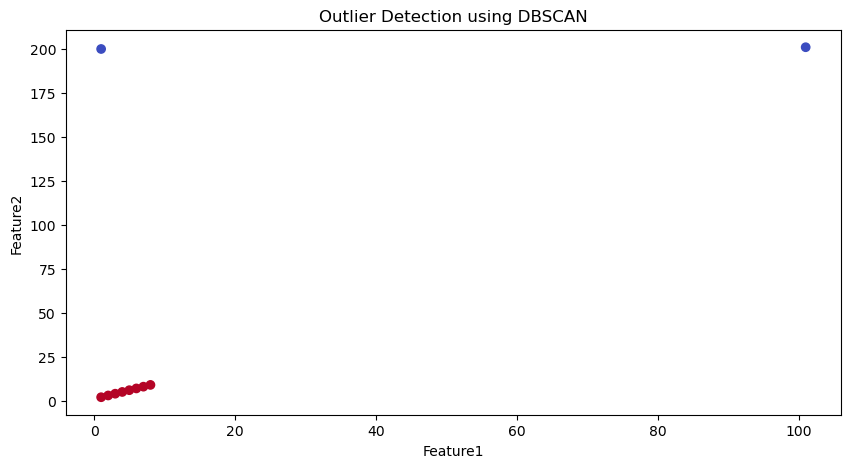

Data points labeled as outliers by DBSCAN (Cluster = -1):
   Feature1  Feature2  Cluster
8         1       200       -1
9       101       201       -1


In [11]:
from sklearn.cluster import DBSCAN

# Example DataFrame for DBSCAN
data = {'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 1, 101],
        'Feature2': [2, 3, 4, 5, 6, 7, 8, 9, 200, 201]}
df_dbscan = pd.DataFrame(data)

# Applying DBSCAN
dbscan = DBSCAN(eps=3, min_samples=2)
df_dbscan['Cluster'] = dbscan.fit_predict(df_dbscan[['Feature1', 'Feature2']])

# Visualizing the clusters and outliers
plt.figure(figsize=(10, 5))
plt.scatter(df_dbscan['Feature1'], df_dbscan['Feature2'], c=df_dbscan['Cluster'], cmap='coolwarm')
plt.title('Outlier Detection using DBSCAN')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

print("Data points labeled as outliers by DBSCAN (Cluster = -1):")
print(df_dbscan[df_dbscan['Cluster'] == -1])
